In [26]:
import pandas as pd

%matplotlib inline

train = pd.read_csv('./data/act_train.csv')
test = pd.read_csv('./data/act_test.csv')
ppl = pd.read_csv('./data/people.csv')
ppl.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [25]:
df_train = pd.merge(train, ppl, on='people_id')
df_test = pd.merge(test, ppl, on='people_id')

df_train.head()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


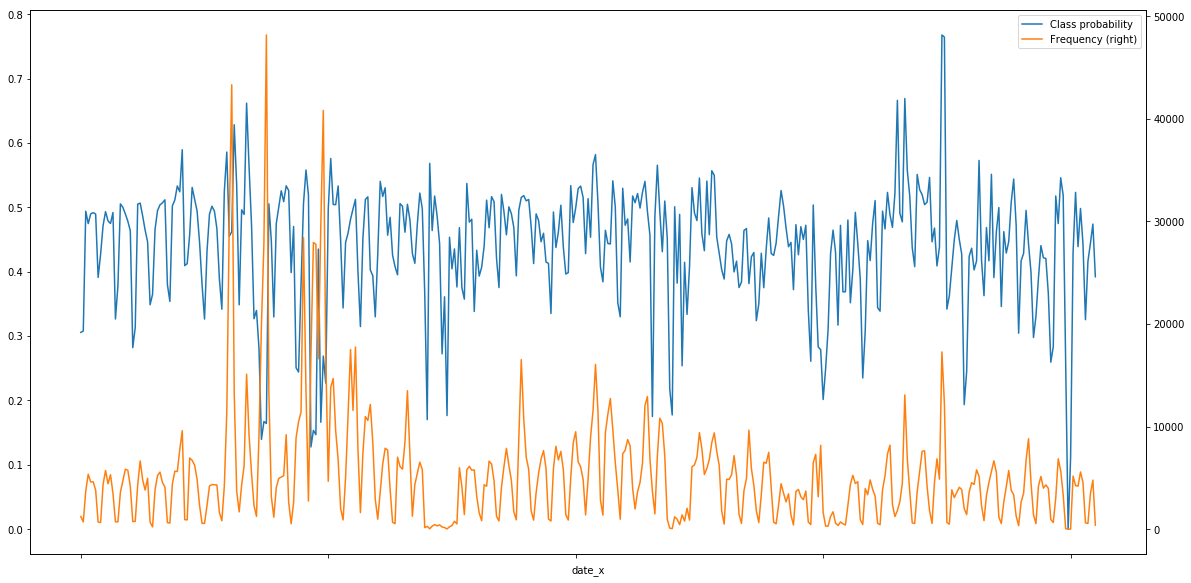

In [16]:
date_x = pd.DataFrame()
date_x['Class probability'] = df_train.groupby('date_x')['outcome'].mean()
date_x['Frequency'] = df_train.groupby('date_x')['outcome'].size()
date_x.plot(secondary_y='Frequency', figsize=(20, 10))

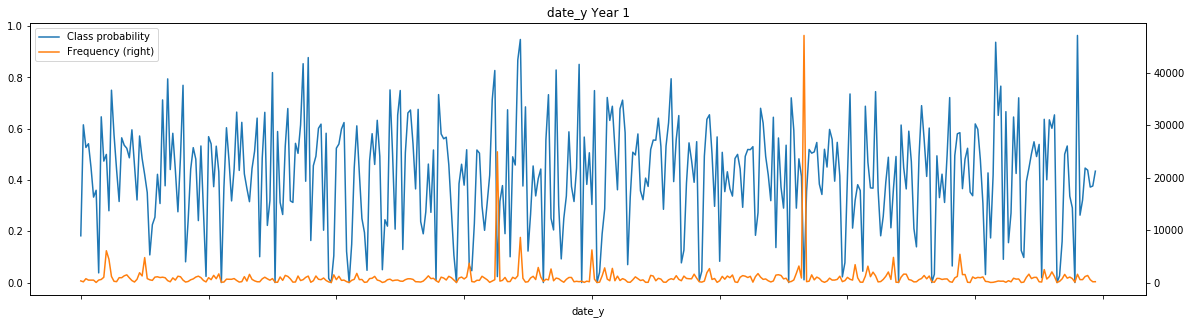

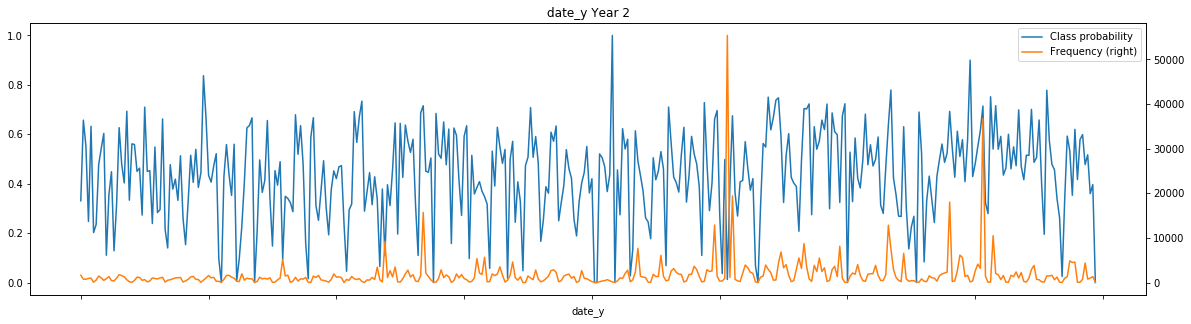

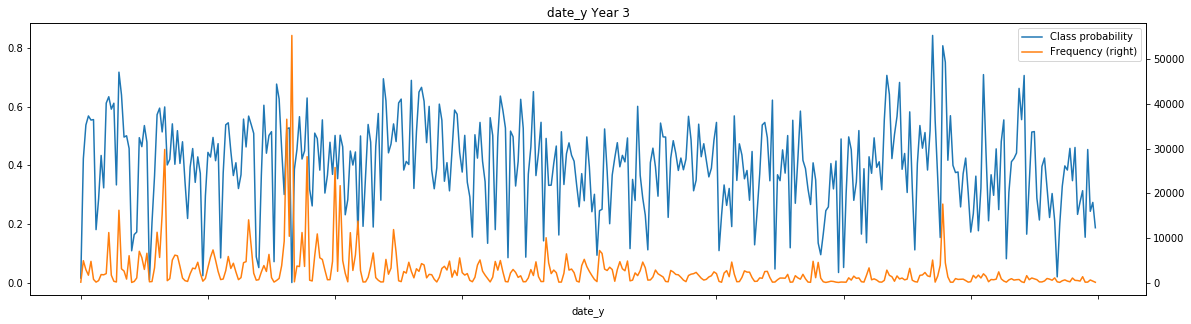

In [17]:
date_y = pd.DataFrame()
date_y['Class probability'] = df_train.groupby('date_y')['outcome'].mean()
date_y['Frequency'] = df_train.groupby('date_y')['outcome'].size()
# We need to split it into multiple graphs since the time-scale is too long to show well on one graph
i = int(len(date_y) / 3)
date_y[:i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 1')
date_y[i:2*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2')
date_y[2*i:].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 3')

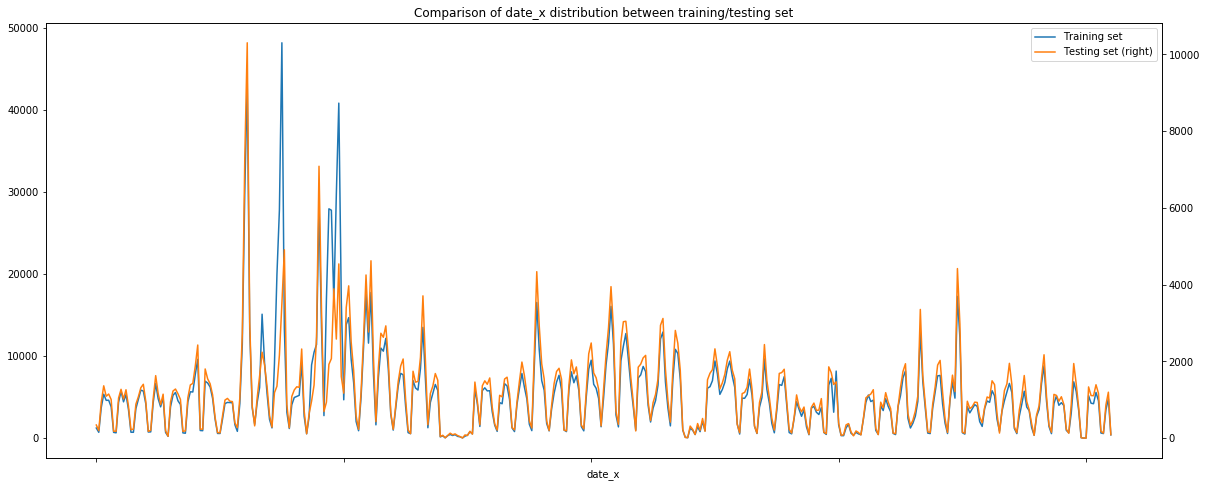

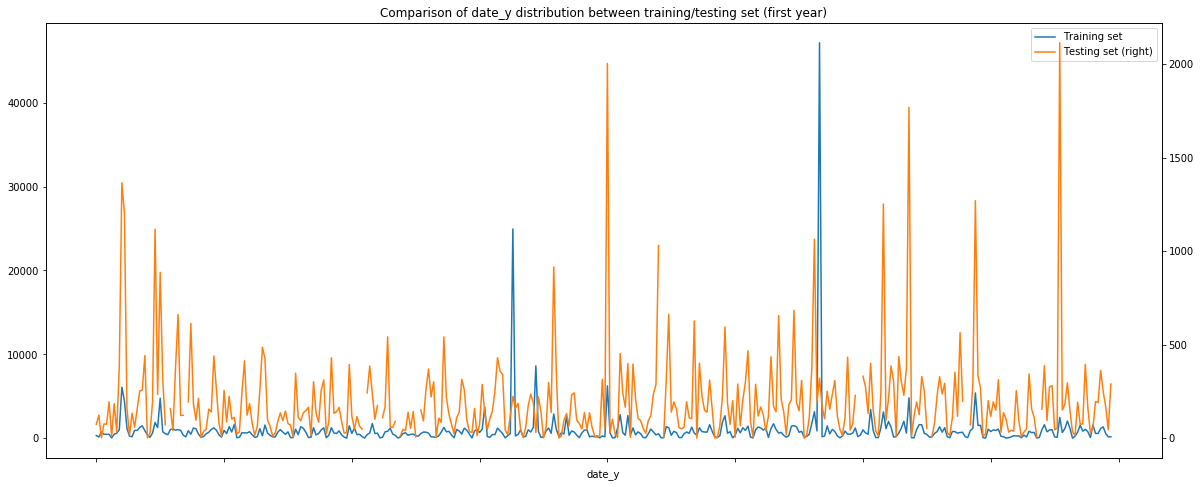

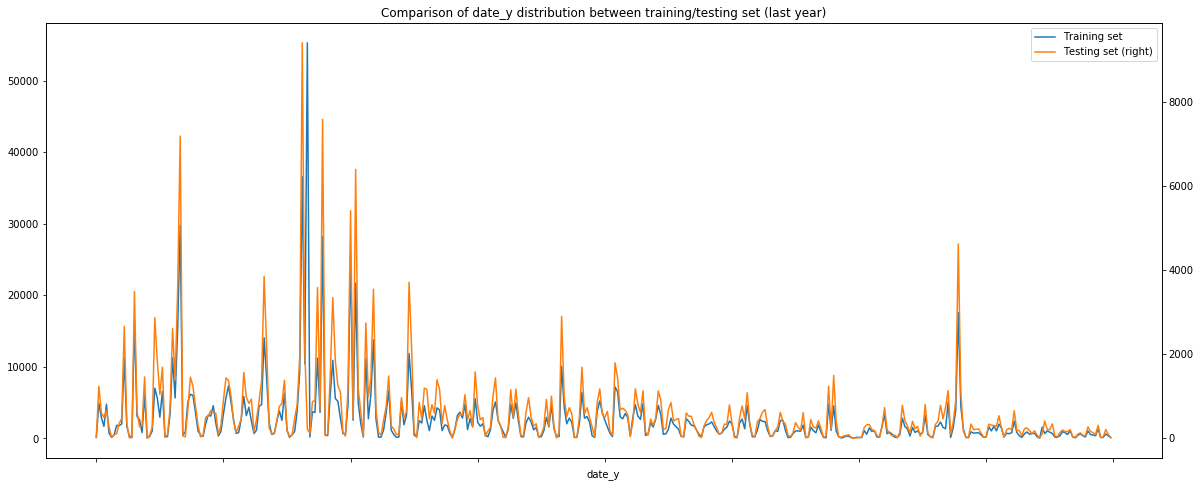

In [23]:
date_x_freq = pd.DataFrame()
date_x_freq['Training set'] = df_train.groupby('date_x')['activity_id'].count()
date_x_freq['Testing set'] = df_test.groupby('date_x')['activity_id'].count()
date_x_freq.plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_x distribution between training/testing set')
date_y_freq = pd.DataFrame()
date_y_freq['Training set'] = df_train.groupby('date_y')['activity_id'].count()
date_y_freq['Testing set'] = df_test.groupby('date_y')['activity_id'].count()
date_y_freq[:i].plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_y distribution between training/testing set (first year)')
date_y_freq[2*i:].plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_y distribution between training/testing set (last year)')